In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# unscaled, log-normalized counts, with conditions subsampled to the same number of cells 
# and 2000 highly variable genes calculated jointly across all perturbation conditions, including control, using scanpy28 with default parameters (Supplementary Methods)

In [3]:
from anndata import read_h5ad
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import scanpy as sc
import seaborn as sns
import string
import sys

np.random.seed(42)

In [4]:
def subsample_adata(adata, group_by):
    min_count = adata.obs[group_by].value_counts().min()
    adata_subsampled = adata.copy()
    sampled_indices = []
    
    for dose in adata.obs[group_by].unique():
        group_indices = adata.obs[adata.obs[group_by] == dose].index
        sampled_group_indices = np.random.choice(group_indices, min_count, replace=False)
        sampled_indices.extend(sampled_group_indices)
    
    adata_subsampled = adata_subsampled[sampled_indices, :]
    return adata_subsampled

In [5]:
def prepare(adata):
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000)
    adata = adata[:, adata.var.highly_variable]
    adata.obs[group_by] = adata.obs[group_by].astype('category')
    sc.pp.neighbors(adata, n_pcs=0)
    sc.tl.umap(adata)
    return adata

In [7]:
a1 = subsample_adata(read_h5ad("/data/bionets/datasets/scrnaseq_ji/sciplex_A549.hdf5"), "dose_value")
#a2 = subsample_adata(read_h5ad("/mnt/data/sciplex_MCF7.hdf5"), "dose_value")
#a3 = subsample_adata(read_h5ad("/mnt/data/sciplex_K562.hdf5"), "dose_value")

In [8]:
group_by = "dose_value"
reference = 0.0

In [9]:
a549 = prepare(a1)
#mcf7 = prepare(a2)
#k562 = prepare(a3)

/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:406: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tmp/ipykernel_1011321/2966470283.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[group_by] = adata.obs[group_by].astype('category')
/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [10]:
a549.obs.columns

Index(['ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time',
       'dose_value', 'pathway_level_1', 'pathway_level_2', 'perturbation',
       'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'cancer',
       'tissue_type', 'organism', 'perturbation_type', 'ngenes',
       'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'n_genes',
       'perturbation_name', 'log10(dose_value)'],
      dtype='object')

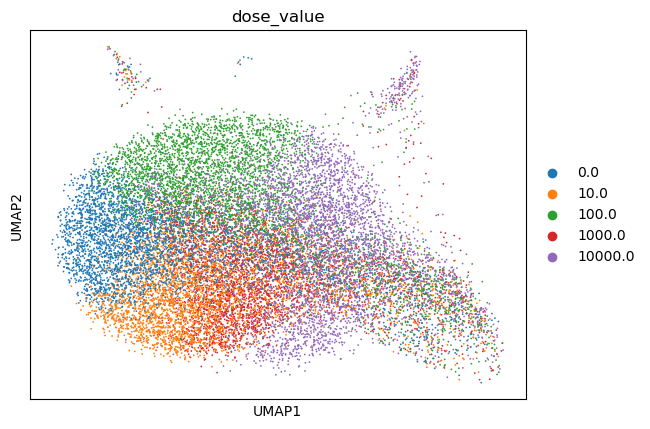

In [11]:
sc.pl.umap(a549, color="dose_value")

In [61]:
dfs_1["7543"]

control_group  metric                                            
1000.0         p-val                                                 1.125418e-01
               z-score                                              -1.245510e+00
               relative support                                      1.000000e+00
               Jaccard similarity to reference matching              1.000000e+00
               Percentage of reference matching edges in matching    1.000000e+00
               Number of edges                                       2.845974e+07
10.0           p-val                                                 7.028394e-02
               z-score                                              -1.506008e+00
               relative support                                      1.000000e+00
               Jaccard similarity to reference matching              1.000000e+00
               Percentage of reference matching edges in matching    1.000000e+00
               Number of edges  

In [62]:
dfs_2["7543"]

control_group  metric                                            
1000.0         p-val                                                 1.125418e-01
               z-score                                              -1.245510e+00
               relative support                                      1.000000e+00
               Jaccard similarity to reference matching              1.000000e+00
               Percentage of reference matching edges in matching    1.000000e+00
               Number of edges                                       2.845974e+07
10.0           p-val                                                 7.028394e-02
               z-score                                              -1.506008e+00
               relative support                                      1.000000e+00
               Jaccard similarity to reference matching              1.000000e+00
               Percentage of reference matching edges in matching    1.000000e+00
               Number of edges  

In [81]:
dfs_1 = pd.read_csv("../plots/sciplex_A549_combined_results_k_influence.csv")
dfs_2 = pd.read_csv("../plots/sciplex_A549_combined_results_k_influence_k_small.csv").drop(columns=["7543"])
dfs_1_old = pd.read_csv("../plots/fig2/sciplex_A549_combined_results_k_influence.csv")

for dfs in [dfs_1, dfs_1_old, dfs_2]:
    dfs.rename({"Unnamed: 0": "control_group", "Unnamed: 1": "metric"}, axis=1, inplace=True)
    groups = sorted(dfs["control_group"].unique())
    dfs.set_index(["control_group", "metric"], inplace=True)
dfs = pd.concat([dfs_1, dfs_2], axis=1)

In [64]:
dfs.columns

Index(['5000', '2500', '1000', '500', '100', '7543', '5', '10', '20', '50'], dtype='object')

In [65]:
colors = sns.color_palette("hls", len(groups) + 1)
pal = {group: colors[i] for i, group in enumerate(groups + [reference])}

In [66]:
a549.obs[group_by] = a549.obs[group_by].astype('category')

In [67]:
colors = [pal[v] for v in a549.obs[group_by].values]

In [68]:
dfs.sort_index(axis=1).sort_index(axis=0, inplace=True)

In [ ]:
df = dfs.loc[group]
df = df[np.array(sorted(df.columns.astype(int))).astype(str)]

In [84]:
df = dfs_1_old.loc[group]
df = df[np.array(sorted(df.columns.astype(int))).astype(str)]
df

,100,500,1000,2500,5000,7543
metric,,,,,,
p-val,3.811864e-09,1.168816e-09,1.694705e-05,1.168816e-09,2.581192e-09,1.739014e-08
z-score,-5.804235e+00,-5.999609e+00,-4.176119e+00,-5.999609e+00,-5.869360e+00,-5.543736e+00
relative support,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Jaccard similarity to reference matching,4.821453e-02,1.716105e-01,2.788608e-01,5.339569e-01,8.576705e-01,1.000000e+00
Percentage of reference matching edges in matching,9.199364e-02,2.929480e-01,4.361082e-01,6.961824e-01,9.233828e-01,1.000000e+00
Number of edges,7.528030e+05,3.613924e+06,6.978807e+06,1.562013e+07,2.512624e+07,2.845974e+07


In [85]:
df = dfs_1.loc[group]
df = df[np.array(sorted(df.columns.astype(int))).astype(str)]
df

,100,500,1000,2500,5000,7543
metric,,,,,,
p-val,7.816036e-10,7.084737e-06,5.254338e-06,3.451568e-10,5.605869e-09,1.739014e-08
z-score,-6.064734e+00,-4.371493e+00,-4.436617e+00,-6.194983e+00,-5.739110e+00,-5.543736e+00
relative support,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Jaccard similarity to reference matching,4.952699e-02,1.747119e-01,2.875917e-01,5.493941e-01,8.613373e-01,1.000000e+00
Percentage of reference matching edges in matching,9.437964e-02,2.974549e-01,4.467126e-01,7.091729e-01,9.255037e-01,1.000000e+00
Number of edges,7.528030e+05,3.613924e+06,6.978806e+06,1.562011e+07,2.512624e+07,2.845974e+07


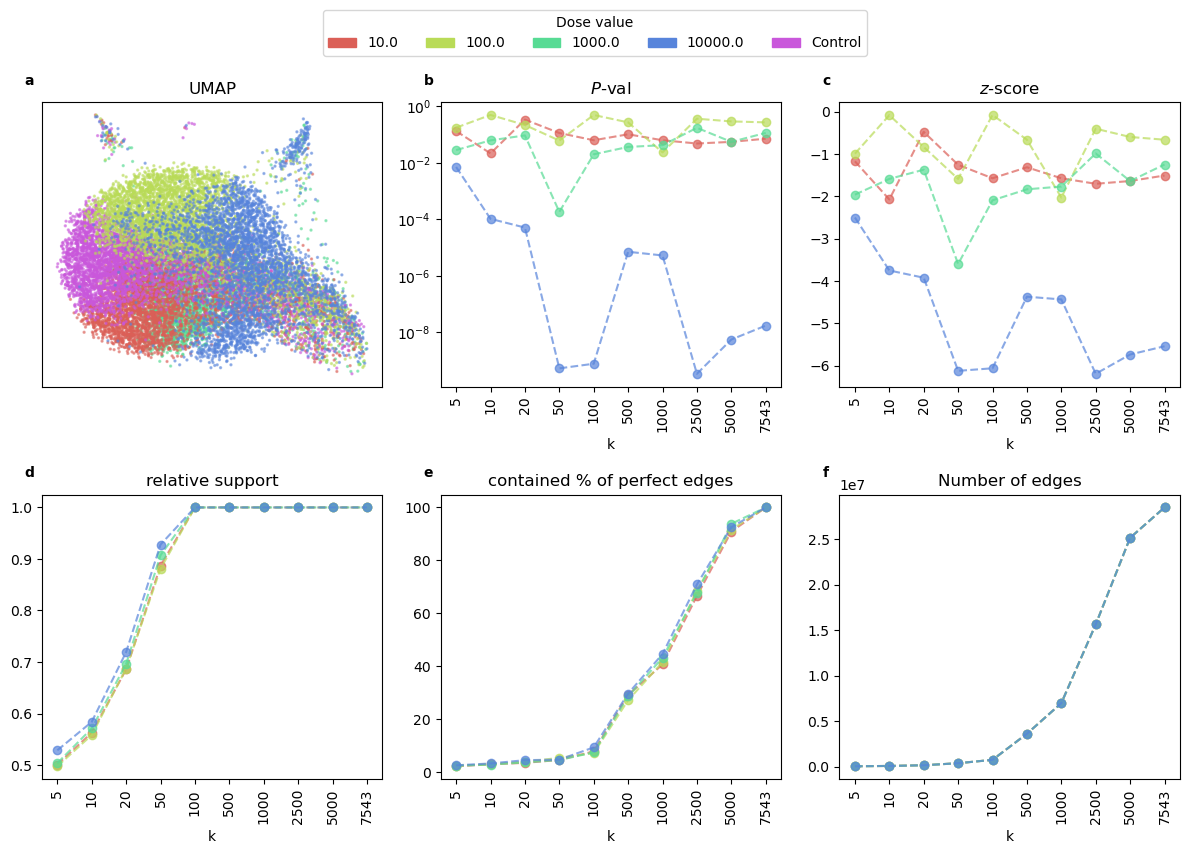

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=False)

k_values = np.unique(dfs.columns.astype(int))

# Define subplot labels: 'a', 'b', 'c', etc.
labels = string.ascii_lowercase  

# Create a single figure with 5 subplots in one row
metrics = ['p-val', 'z-score', 'relative support', 'Percentage of reference matching edges in matching', 'Number of edges']
axes[0,0].scatter(x=a549.obsm["X_umap"][:,0], y=a549.obsm["X_umap"][:,1], alpha=0.5, s=2, c=colors)
axes[0,0].set_title("UMAP")
axes[0,0].set_xticks([], [])
axes[0,0].set_yticks([], [])

for i, metric in enumerate(metrics):
    x, y = (i + 1) // 3, (i + 1) % 3
    for group in groups:
        df = dfs.loc[group]
        df = df[np.array(sorted(df.columns.astype(int))).astype(str)]
        if metric == "Percentage of reference matching edges in matching":
            df.loc[metric] *= 100
        x_positions = np.searchsorted(k_values, df.columns.astype(int))
        axes[x, y].plot(x_positions, df.loc[metric], 'o--', label=group, color=pal[group], alpha=0.7)
    if metric in ['p-val']:
        axes[x, y].set_yscale('log')
    axes[x, y].set_title(metric.replace("Percentage of reference matching edges in matching", "contained % of perfect edges").replace("p-val", "$P$-val").replace("z-score", "$z$-score"))
    axes[x, y].set_xlabel('k')
    axes[x, y].set_xticks(ticks=(np.unique(x_positions)))

    axes[x, y].set_xticklabels(labels=k_values.astype(str)) 
    axes[x, y].tick_params(axis='x', labelrotation=90)
    

for i in range(np.prod(axes.shape)):
    x, y = i // 3, i % 3
    axes[x, y].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axes[x, y].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
    
pal["Control"] = pal[0.0]
del pal[0.0]
handles = [patches.Patch(color=color, label=label) for label, color in pal.items()]
fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 1.07), ncol=len(pal), title="Dose value")
plt.tight_layout()
plt.savefig("../plots/fig2/fig2-1.pdf", bbox_inches="tight")

In [76]:
df

,5,10,20,50,100,500,1000,2500,5000,7543
metric,,,,,,,,,,
p-val,0.007035,0.000103,0.000051,5.370237e-10,7.816036e-10,7.084737e-06,5.254338e-06,3.451568e-10,5.605869e-09,1.739014e-08
z-score,-2.499317,-3.751620,-3.923085,-6.125681e+00,-6.064734e+00,-4.371493e+00,-4.436617e+00,-6.194983e+00,-5.739110e+00,-5.543736e+00
relative support,0.528632,0.583775,0.719247,9.278897e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Jaccard similarity to reference matching,0.017829,0.021721,0.027571,2.566996e-02,4.952699e-02,1.747119e-01,2.875917e-01,5.493941e-01,8.613373e-01,1.000000e+00
Percentage of reference matching edges in matching,0.026776,0.033669,0.046129,4.825027e-02,9.437964e-02,2.974549e-01,4.467126e-01,7.091729e-01,9.255037e-01,1.000000e+00
Number of edges,45194.000000,82801.000000,157894.000000,3.821270e+05,7.528030e+05,3.613924e+06,6.978806e+06,1.562011e+07,2.512624e+07,2.845974e+07


In [72]:

group

10000.0